In [26]:
import numpy as np
import sys
import cv2
sys.path.insert(1, './models/PSMNet')
from generate_disparity import generate_disparity 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

load PSMNet
Number of model parameters: 5224768


In [27]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

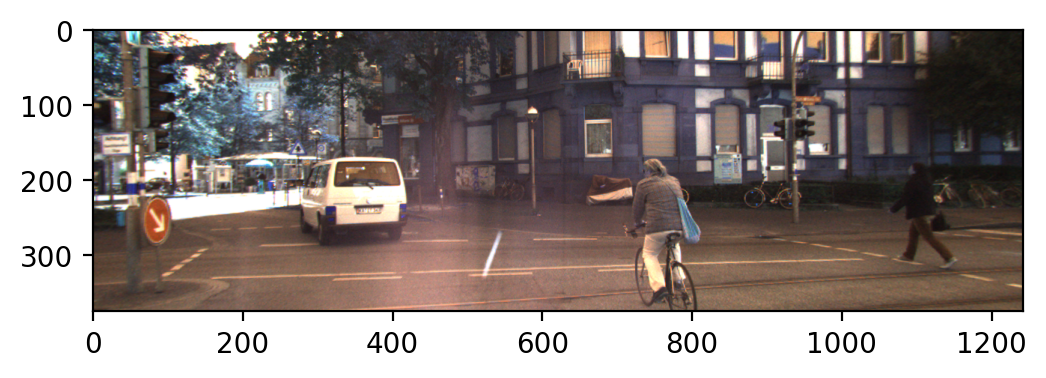

In [28]:
left = cv2.imread('./inputs/left.png')
right = cv2.imread('./inputs/right.png')
plt.imshow(right)

In [29]:
generate_disparity('inputs/left.png', '../2011_09_26/2011_09_26_drive_0005_sync/image_03/data/0000000000.png', False)

/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 60, in _worker
    output = module(*input, **kwargs)
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "./models/PSMNet/models/stackhourglass.py", line 127, in forward
    out2, pre2, post2 = self.dres3(out1, pre1, post1)
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "./models/PSMNet/models/stackhourglass.py", line 48, in forward
    out  = self.conv6(post)  #in:1/8 out:1/4
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/container.py", line 100, in forward
    input = module(input)
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/mohammad.nomaan/env/lib/python3.6/site-packages/torch/nn/modules/conv.py", line 921, in forward
    output_padding, self.groups, self.dilation)
RuntimeError: CUDA out of memory. Tried to allocate 594.00 MiB (GPU 0; 10.91 GiB total capacity; 1.37 GiB already allocated; 309.88 MiB free; 1.91 GiB reserved in total by PyTorch)


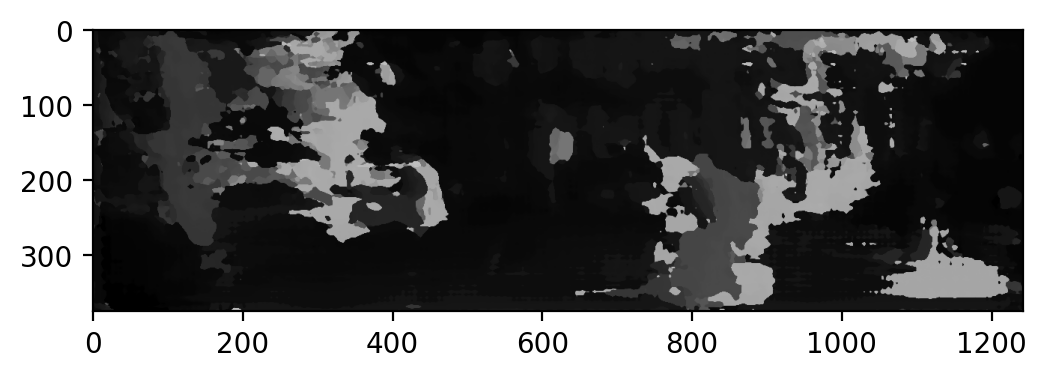

In [80]:
disparity = cv2.imread('./disparity.png')
plt.imshow(disparity)

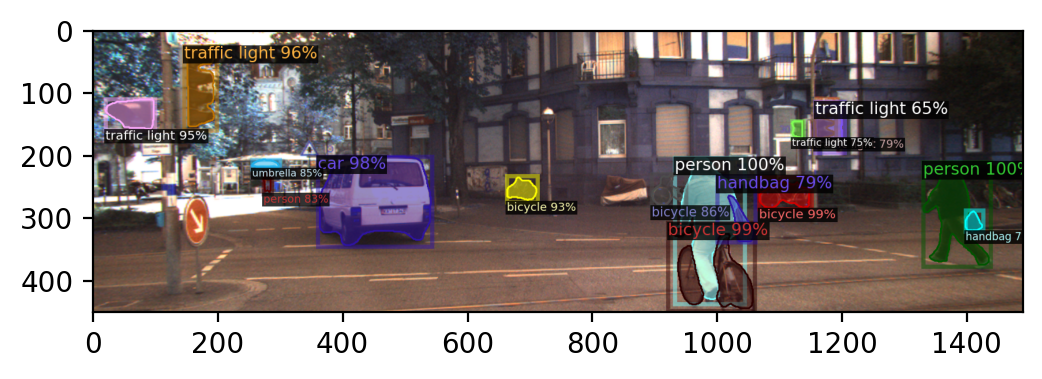

In [73]:
im = cv2.imread('./inputs/left.png')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imwrite('outputs/instance_segmentation/output.jpg',v.get_image()[:, :, ::-1])
plt.imshow(v.get_image()[:, :, ::-1])